In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from datetime import datetime
import seaborn as sns
%matplotlib inline

data = pd.read_csv("./Road Accident/Road-Accident.csv", na_values=-1, parse_dates=['time'], infer_datetime_format=True)

data.head()
data.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(285331, 70)

In [3]:

nan_values = [[c, data[c].isnull().sum()/data.shape[0]] for c in data.columns.values]
for n in nan_values:
    if n[1] > 0.4:
        print(n)
        
# we are removing columns with str types   
data = data.select_dtypes(exclude=['O'])
        
print(data.shape)

# we are dropping columns with more than 40% missing values
for i in nan_values:
    if i[1] > 0.4:
        data.drop(i[0],axis=1, inplace=True)
print(data.shape)

data.head()

['driver_imd_decile', 1.0]
['vehicle_imd_decile', 1.0]
['casualty_home_area_type', 0.42200461919665233]
['casualty_imd_decile', 0.47667445878646203]
(285331, 66)
(285331, 62)


,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type
0,2,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,...,1.0,51.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0
3,1,20.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,34.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1,9.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#trying to find relationships between input features

# reduced_data = data[50, :]

print(data['vehicle_reference'].corr(data['vehicle_type']))


for x in data.columns.values:
    for y in data.columns.values:
        if x == 'time' or y == 'time':
#             if x == 'time':
#                 l = []
#                 for i in data[x]:
#                     if type(i) != pd._libs.tslib.Timestamp:
#                         l.append(np.nan)
#                     else:
#                         l.append(i.time().hour)
#                 l = pd.Series(l)
#                 if x != y and l.corr(data[y]) > 0.9:
#                     print(x)
#                     print(y)
#                     plt.plot(l, data[y], 'rx')
#                     plt.show()
            
#             if y == 'time':
#                 l = []
#                 for i in data[y]:
#                     if type(i) != pd._libs.tslib.Timestamp:
#                         l.append(np.nan)
#                     else:
#                         l.append(i.time().hour)
#                 l = pd.Series(l)
#                 if x != y and l.corr(data[x]) > 0.9:
#                     print(x)
#                     print(y)
#                     plt.plot(data[x], l, 'rx')
#                     plt.show()
        elif x != y and data[x].corr(data[y]) > 0.9:
            print(x)
            print(y)
            plt.plot(data[x], data[y], 'rx')
            plt.show()
            print()

In [4]:
data.drop('number_of_casualties', axis=1, inplace=True)
data.drop('age_band_of_driver', axis=1, inplace=True)
data.drop('location_easting_osgr', axis=1, inplace=True)
data.drop('location_northing_osgr', axis=1, inplace=True)
data.drop('local_authority_(district)', axis=1, inplace=True)


In [5]:
print(data.shape)

(285331, 57)


In [6]:
# print(data['casualty_class'])
# print(pd.isnull(data['casualty_class']).sum())

nan_casualties = data[pd.isnull(data['casualty_class'])]

print("data shape: ", data.shape)
print("nan casualties shape: ", nan_casualties.shape)

data['casualty_class'].value_counts()

mean = data['casualty_class'].mean()

casualties = data['casualty_class'].dropna()
casualty_index = np.array(casualties.index)

print("casualty index: ", casualty_index)

casualties = data.iloc[casualty_index, :]

casualties.head()

data shape:  (285331, 57)
nan casualties shape:  (99259, 57)
casualty index:  [     2      3      5 ... 285327 285329 285330]


,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type
2,2,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,...,1.0,51.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0
3,1,20.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,34.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
5,2,1.0,0.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,...,1.0,46.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1,3.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,27.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
8,1,9.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,12.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0


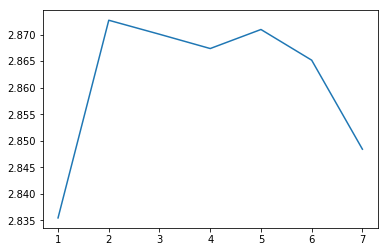

In [7]:
plt.plot(data.groupby('day_of_week')['casualty_severity'].mean())

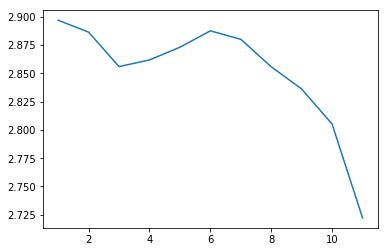

In [8]:
plt.plot(data.groupby('age_band_of_casualty')['casualty_severity'].mean())

In [9]:
data.groupby('sex_of_driver')['casualty_severity'].mean()

sex_of_driver
1.0    2.840520
2.0    2.910056
3.0    2.847300
Name: casualty_severity, dtype: float64

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.62029e+05, 3.53400e+03, 1.00000e+02, 5.30000e+01, 2.07200e+03,
        1.11840e+04, 2.41100e+03, 1.34000e+02, 7.21000e+02, 3.83200e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

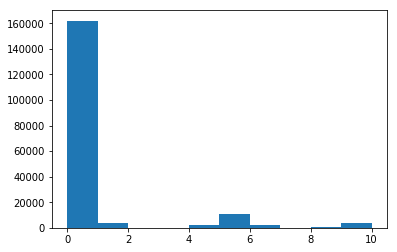

In [10]:
# plt.plot(data.longitude, data.latitude, 'rx')
plt.hist(data['pedestrian_location'])

(array([120355.,      0.,      0.,      0.,      0.,  41674.,      0.,
             0.,      0.,  24043.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

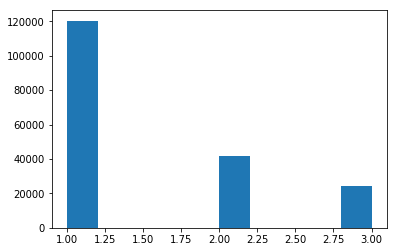

In [11]:
plt.hist(data['casualty_class'])

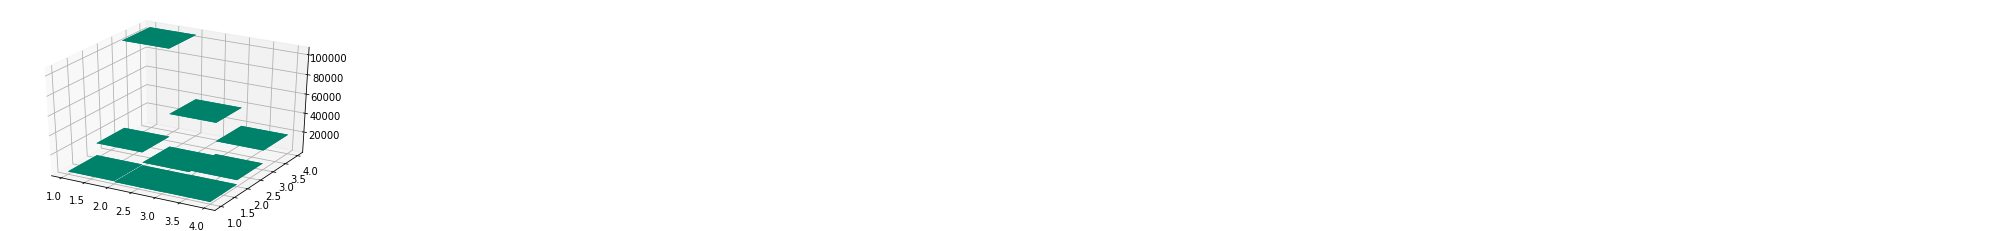

   casualty_class  casualty_severity       C
0             1.0                1.0    1067
1             1.0                2.0   14025
2             1.0                3.0  105263
3             2.0                1.0     254
4             2.0                2.0    3171
5             2.0                3.0   38249
6             3.0                1.0     408
7             3.0                2.0    4938
8             3.0                3.0   18697
RangeIndex(start=0, stop=9, step=1)
Index(['casualty_class', 'casualty_severity', 'C'], dtype='object')


In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = plt.axes(projection='3d')
ax = fig.add_subplot(111, projection='3d')
counts = pd.crosstab(data.casualty_class, data.casualty_severity).stack().reset_index(name='C')
counts2 = pd.crosstab(data.casualty_class, data.casualty_severity)

# ax.scatter3D(counts.casualty_class, counts.casualty_severity, counts.C)
# plt.show()

dx = np.ones(len(counts.casualty_class))
dy = np.ones(len(counts.casualty_class))
dz = np.ones(len(counts.casualty_class))

ax.bar3d(counts.casualty_class, counts.casualty_severity, counts.C, dx, dy, dz, color='#00ceaa')
plt.show()

# ax.plot3D(counts.casualty_class, counts.casualty_severity, counts.C)
# plt.show()

print(counts)
print(counts.index)
print(counts.columns)

# ax.contour3D(counts.casualty_class, counts.casualty_severity, counts.C)


Text(0, 0.5, 'casualty severity')

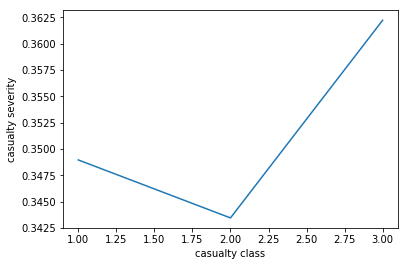

In [13]:
plt.plot(1/data.groupby('casualty_class')['casualty_severity'].mean())
plt.xlabel('casualty class')
plt.ylabel('casualty severity')

(array([47675., 10368., 12195.,  4937.,  6681.,  6444., 17394.,     0.,
         7015.,     0., 18524.,  7983.,     0.,     0.,     0.,  4585.,
         9843.,  7383.,  7648.,  2957.,  3148., 13079., 10893., 16440.,
        19299.,   593.,  7718.,  7939.,  6910.,     0.,     0.,  2713.,
         5992.,  2780.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         2012.,  1671.,  5010.,  7502.]),
 array([ 1.        ,  2.86538462,  4.73076923,  6.59615385,  8.46153846,
        10.32692308, 12.19230769, 14.05769231, 15.92307692, 17.78846154,
        19.65384615, 21.51923077, 23.38461538, 25.25      , 27.11538462,
        28.98076923, 30.84615385, 32.71153846, 34.57692308, 36.44230769,
        38.30769231, 40.17307692, 42.03846154, 43.90384615, 45.76923077,
        47.63461538, 49.5       , 51.36538462, 53.23076923, 55.09615385,
        56.96153846, 58.82692308, 60.69230769, 62.55769231, 64.42307692,
        66.2884

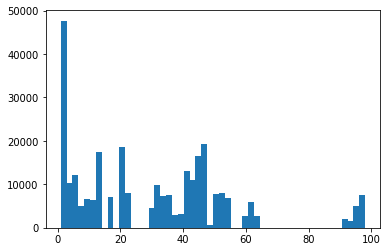

In [14]:
plt.hist(data.police_force, bins=52)

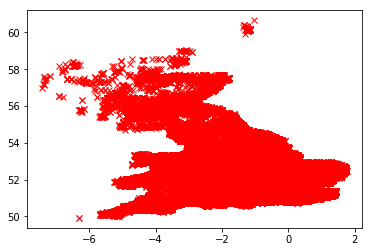

In [18]:
plt.plot(data.longitude, data.latitude, 'rx')

(array([31539., 40751., 43159., 43204., 43552., 45779., 37347.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

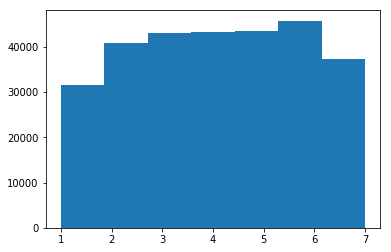

In [16]:
plt.hist(data.day_of_week, bins=7)

In [9]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

load_boston()


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3